## 多项式回归

- 逻辑与线性回归基本一致, 只是引用的函数不一样

$$ y(x, w) = w_0 + w_1x + w_2x^2 +...+w_mx^m =\sum\limits_{j=0}^{m}w_jx^j \tag{1}$$

### 代码

#### 二次项回归

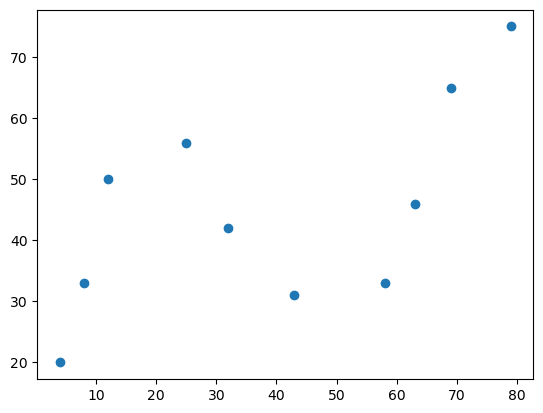

In [1]:
from matplotlib import pyplot as plt

%matplotlib inline

def func(p, x):
    # 定义 2 次多项式函数
    w0, w1, w2 = p
    f = w0 + w1 * x + w2 * x * x
    return f


def err_func(p, x, y):
    # 残差函数（观测值与拟合值之间的差距）
    ret = func(p, x) - y
    return ret

# 加载示例数据
x = [4, 8, 12, 25, 32, 43, 58, 63, 69, 79]
y = [20, 33, 50, 56, 42, 31, 33, 46, 65, 75]

plt.scatter(x, y)

Fitting Parameters:  [ 3.76893113e+01 -2.60474108e-01  8.00078031e-03]


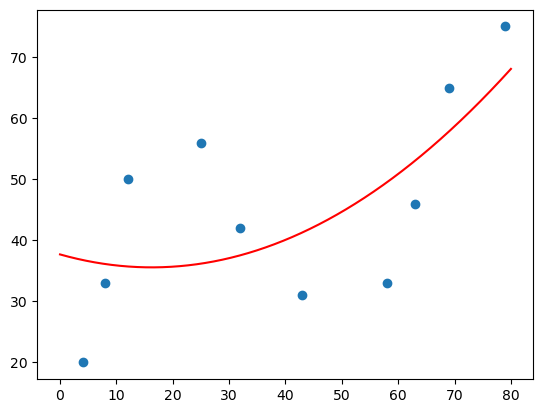

In [2]:
import numpy as np
from scipy.optimize import leastsq

p_init = np.random.randn(3)  # 生成 3 个随机数
# 使用 Scipy 提供的最小二乘法函数得到最佳拟合参数
parameters = leastsq(err_func, p_init, args=(np.array(x), np.array(y)))

print("Fitting Parameters: ", parameters[0])

# 绘制拟合图像时需要的临时点
x_temp = np.linspace(0, 80, 10000)

# 绘制拟合函数曲线
plt.plot(x_temp, func(parameters[0], x_temp), "r")

# 绘制原数据点
plt.scatter(x, y)

#### N次多项式拟合

In [4]:
def fit_func(p, x):
    """根据公式，定义 n 次多项式函数"""
    f = np.poly1d(p)
    return f(x)


def err_func(p, x, y):
    """残差函数（观测值与拟合值之间的差距）"""
    ret = fit_func(p, x) - y
    return ret


def n_poly(n):
    """n 次多项式拟合"""
    p_init = np.random.randn(n)  # 生成 n 个随机数
    parameters = leastsq(err_func, p_init, args=(np.array(x), np.array(y)))
    return parameters[0]

n_poly(3)

array([ 8.00077985e-03, -2.60474064e-01,  3.76893106e+01])

Text(0.5, 1.0, 'm = 8')

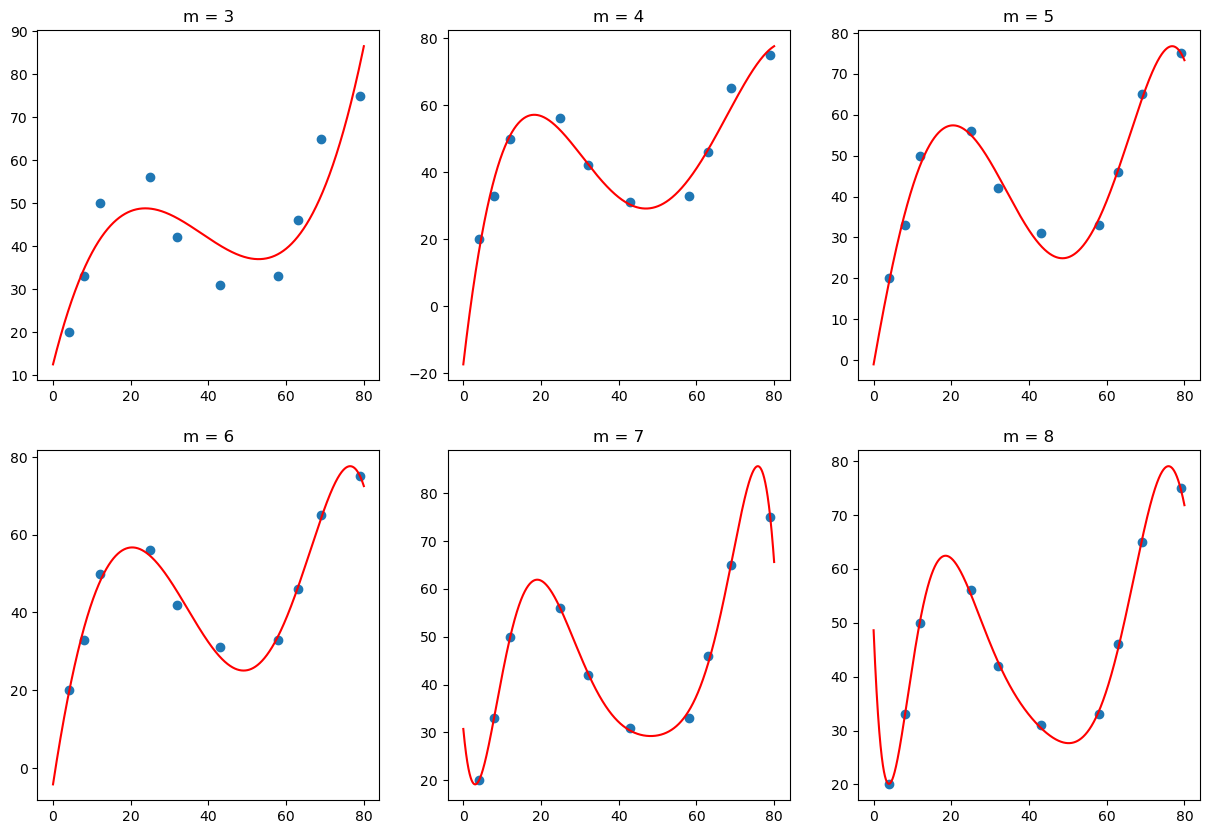

In [5]:
# 绘制拟合图像时需要的临时点
x_temp = np.linspace(0, 80, 10000)

# 绘制子图
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].plot(x_temp, fit_func(n_poly(4), x_temp), "r")
axes[0, 0].scatter(x, y)
axes[0, 0].set_title("m = 3")

axes[0, 1].plot(x_temp, fit_func(n_poly(5), x_temp), "r")
axes[0, 1].scatter(x, y)
axes[0, 1].set_title("m = 4")

axes[0, 2].plot(x_temp, fit_func(n_poly(6), x_temp), "r")
axes[0, 2].scatter(x, y)
axes[0, 2].set_title("m = 5")

axes[1, 0].plot(x_temp, fit_func(n_poly(7), x_temp), "r")
axes[1, 0].scatter(x, y)
axes[1, 0].set_title("m = 6")

axes[1, 1].plot(x_temp, fit_func(n_poly(8), x_temp), "r")
axes[1, 1].scatter(x, y)
axes[1, 1].set_title("m = 7")

axes[1, 2].plot(x_temp, fit_func(n_poly(9), x_temp), "r")
axes[1, 2].scatter(x, y)
axes[1, 2].set_title("m = 8")

#### scikit-learn 单次项与多项式拟合对比

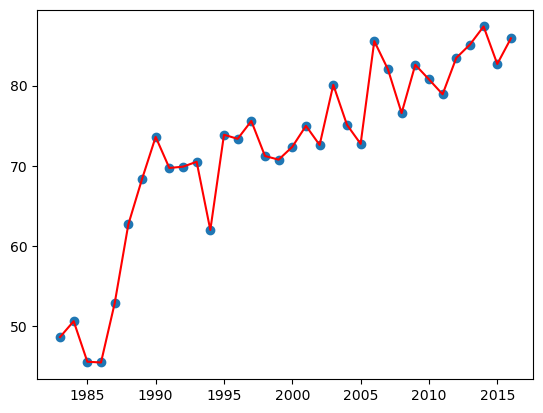

In [11]:
import pandas as pd

# 加载数据集
df = pd.read_csv("course-6-vaccine.csv",header=0)
# 定义 x, y 的取值
x = df["Year"]
y = df["Values"]
# 绘图
plt.plot(x, y, "r")
plt.scatter(x, y)

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# 首先划分 dateframe 为训练集和测试集
train_df = df[: int(len(df) * 0.7)]
test_df = df[int(len(df) * 0.7) :]

# 定义训练和测试使用的自变量和因变量
X_train = train_df["Year"].values
y_train = train_df["Values"].values

X_test = test_df["Year"].values
y_test = test_df["Values"].values


# 建立线性回归模型
model = LinearRegression()
model.fit(X_train.reshape(len(X_train), 1), y_train.reshape(len(y_train), 1))
results = model.predict(X_test.reshape(len(X_test), 1))
print(results) # 线性回归模型在测试集上的预测结果


print("线性回归平均绝对误差: ", mean_absolute_error(y_test, results.flatten()))
print("线性回归均方误差: ", mean_squared_error(y_test, results.flatten()))

[[81.83437635]
 [83.09935437]
 [84.36433239]
 [85.62931041]
 [86.89428843]
 [88.15926645]
 [89.42424447]
 [90.68922249]
 [91.95420051]
 [93.21917853]
 [94.48415655]]
线性回归平均绝对误差:  6.011979515629853
线性回归均方误差:  43.53185829515393


In [13]:
# 2 次多项式回归特征矩阵
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_X_train_2 = poly_features_2.fit_transform(X_train.reshape(len(X_train), 1))
poly_X_test_2 = poly_features_2.fit_transform(X_test.reshape(len(X_test), 1))

# 2 次多项式回归模型训练与预测
model = LinearRegression()
model.fit(poly_X_train_2, y_train.reshape(len(X_train), 1))  # 训练模型

results_2 = model.predict(poly_X_test_2)  # 预测结果

print(results_2.flatten())  # 打印扁平化后的预测结果

print("2 次多项式回归平均绝对误差: ", mean_absolute_error(y_test, results_2.flatten()))
print("2 次多项式均方误差: ", mean_squared_error(y_test, results_2.flatten()))

[71.98010746 70.78151826 69.38584368 67.79308372 66.00323838 64.01630767
 61.83229158 59.45119011 56.87300326 54.09773104 51.12537344]
2 次多项式回归平均绝对误差:  19.79207082954649
2 次多项式均方误差:  464.3290384745864


In [14]:
from sklearn.pipeline import make_pipeline

X_train = X_train.reshape(len(X_train), 1)
X_test = X_test.reshape(len(X_test), 1)
y_train = y_train.reshape(len(y_train), 1)

for m in [3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(X_train, y_train)
    pre_y = model.predict(X_test)
    print("{} 次多项式回归平均绝对误差: ".format(m), mean_absolute_error(y_test, pre_y.flatten()))
    print("{} 次多项式均方误差: ".format(m), mean_squared_error(y_test, pre_y.flatten()))
    print("---")

3 次多项式回归平均绝对误差:  4.547691414650137
3 次多项式均方误差:  29.93305220364425
---
4 次多项式回归平均绝对误差:  4.426426085366537
4 次多项式均方误差:  29.050774513159652
---
5 次多项式回归平均绝对误差:  4.34161548610515
5 次多项式均方误差:  28.22191872438411
---


> 单次项优于二次项, 但随着次项增大必然逐渐减小

MSE 计算结果:  [43.53185829515393, 464.3290384745864, 29.93305220364425, 29.050774513159652, 28.22191872438411, 27.440821621766553, 26.71232008849977, 26.03872959539352, 25.422418034367254, 24.865818415954422]


Text(0, 0.5, 'MSE')

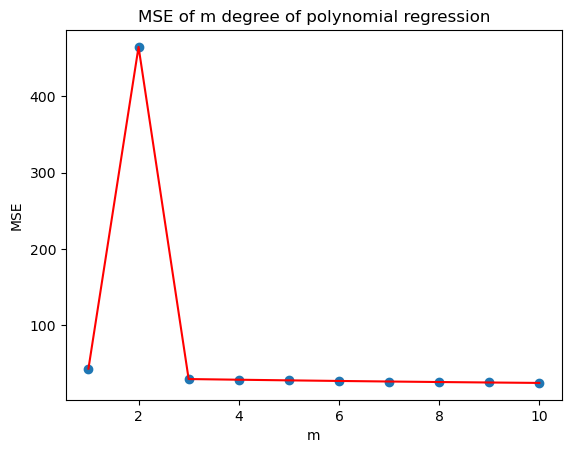

In [15]:
# 计算 m 次多项式回归预测结果的 MSE 评价指标并绘图
mse = []  # 用于存储各最高次多项式 MSE 值
m = 1  # 初始 m 值
m_max = 10  # 设定最高次数
while m <= m_max:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(X_train, y_train)  # 训练模型
    pre_y = model.predict(X_test)  # 测试模型
    mse.append(mean_squared_error(y_test, pre_y.flatten()))  # 计算 MSE
    m = m + 1

print("MSE 计算结果: ", mse)
# 绘图
plt.plot([i for i in range(1, m_max + 1)], mse, "r")
plt.scatter([i for i in range(1, m_max + 1)], mse)

# 绘制图名称等
plt.title("MSE of m degree of polynomial regression")
plt.xlabel("m")
plt.ylabel("MSE")